# Model Fitting using rTPC

With bootstrapping bitches

In [1]:
require('ggplot2')
require('nls.multstart')
require('broom')
require('rTPC')
require('dplyr')
require('data.table')

rm(list=ls())
graphics.off()
setwd("/home/primuser/Documents/VByte/VecMismatchPaper1/code/")

Loading required package: ggplot2

Loading required package: nls.multstart

Loading required package: broom

Loading required package: rTPC

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [2]:
#take a look at the different models available
get_model_names()

[1] "beta_2012"             "boatman_2017"          "briere2_1999"         
 [4] "delong_2017"           "flinn_1991"            "gaussian_1987"        
 [7] "hinshelwood_1947"      "joehnk_2008"           "johnsonlewin_1946"    
[10] "kamykowski_1985"       "lactin2_1995"          "modifiedgaussian_2006"
[13] "oneill_1972"           "pawar_2018"            "quadratic_2008"       
[16] "ratkowsky_1983"        "rezende_2019"          "sharpeschoolfull_1981"
[19] "sharpeschoolhigh_1981" "sharpeschoollow_1981"  "spain_1982"           
[22] "thomas_2012"           "thomas_2017"           "weibull_1995"

In [3]:
#read in the trait data
final_trait_data <- read.csv('../data/Final_Traitofinterest.csv')

In [4]:
#remove completely irrelevant columns 
df <- final_trait_data[,colSums(is.na(final_trait_data))<nrow(final_trait_data)]

In [5]:
#filter to single species and trait
df2 <- dplyr::filter(df, originalid == 'csm7I')

In [6]:
df2

X.1,X,originalid,originaltraitname,originaltraitdef,standardisedtraitname,standardisedtraitdef,originaltraitvalue,originaltraitunit,originalerrorpos,⋯,physicalprocess,physicalprocess_1,physicalprocess_2,figuretable,citation,doi,submittedby,contributoremail,notes,VecMismatchID
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1822,10471,csm7I,Development Rate,,NA,NA,0.03868572,1/day,NA,⋯,NA,NA,NA,NA,"Roy, Mich<8f>le, Jacques Brodeur, and Conrad Cloutier. ""Relationship between temperature and developmental rate of Stethorus punctillum (Coleoptera: Coccinellidae) and its prey Tetranychus mcdanieli (Acarina: Tetranychidae)."" Environmental Entomology 31.1 (2002): 177-187.",10.1603/0046-225X-31.1.198,Cera Mai,csm417@ic.ac.uk,,69
1823,10481,csm7I,Development Rate,,NA,NA,0.05703669,1/day,NA,⋯,NA,NA,NA,NA,"Roy, Mich<8f>le, Jacques Brodeur, and Conrad Cloutier. ""Relationship between temperature and developmental rate of Stethorus punctillum (Coleoptera: Coccinellidae) and its prey Tetranychus mcdanieli (Acarina: Tetranychidae)."" Environmental Entomology 31.1 (2002): 177-187.",10.1603/0046-225X-31.1.199,Cera Mai,csm417@ic.ac.uk,,69
1824,10491,csm7I,Development Rate,,NA,NA,0.08269028,1/day,NA,⋯,NA,NA,NA,NA,"Roy, Mich<8f>le, Jacques Brodeur, and Conrad Cloutier. ""Relationship between temperature and developmental rate of Stethorus punctillum (Coleoptera: Coccinellidae) and its prey Tetranychus mcdanieli (Acarina: Tetranychidae)."" Environmental Entomology 31.1 (2002): 177-187.",10.1603/0046-225X-31.1.200,Cera Mai,csm417@ic.ac.uk,,69
1825,10501,csm7I,Development Rate,,NA,NA,0.14311831,1/day,NA,⋯,NA,NA,NA,NA,"Roy, Mich<8f>le, Jacques Brodeur, and Conrad Cloutier. ""Relationship between temperature and developmental rate of Stethorus punctillum (Coleoptera: Coccinellidae) and its prey Tetranychus mcdanieli (Acarina: Tetranychidae)."" Environmental Entomology 31.1 (2002): 177-187.",10.1603/0046-225X-31.1.201,Cera Mai,csm417@ic.ac.uk,,69
1826,10511,csm7I,Development Rate,,NA,NA,0.22361614,1/day,NA,⋯,NA,NA,NA,NA,"Roy, Mich<8f>le, Jacques Brodeur, and Conrad Cloutier. ""Relationship between temperature and developmental rate of Stethorus punctillum (Coleoptera: Coccinellidae) and its prey Tetranychus mcdanieli (Acarina: Tetranychidae)."" Environmental Entomology 31.1 (2002): 177-187.",10.1603/0046-225X-31.1.202,Cera Mai,csm417@ic.ac.uk,,69
1827,10521,csm7I,Development Rate,,NA,NA,0.32054076,1/day,NA,⋯,NA,NA,NA,NA,"Roy, Mich<8f>le, Jacques Brodeur, and Conrad Cloutier. ""Relationship between temperature and developmental rate of Stethorus punctillum (Coleoptera: Coccinellidae) and its prey Tetranychus mcdanieli (Acarina: Tetranychidae)."" Environmental Entomology 31.1 (2002): 177-187.",10.1603/0046-225X-31.1.203,Cera Mai,csm417@ic.ac.uk,,69
1828,10531,csm7I,Development Rate,,NA,NA,0.36444265,1/day,NA,⋯,NA,NA,NA,NA,"Roy, Mich<8f>le, Jacques Brodeur, and Conrad Cloutier. ""Relationship between temperature and developmental rate of Stethorus punctillum (Coleoptera: Coccinellidae) and its prey Tetranychus mcdanieli (Acarina: Tetranychidae)."" Environmental Entomology 31.1 (2002): 177-187.",10.1603/0046-225X-31.1.204,Cera Mai,csm417@ic.ac.uk,,69
1829,10541,csm7I,Development Rate,,NA,NA,0.39921708,1/day,NA,⋯,NA,NA,NA,NA,"Roy, Mich<8f>le, Jacques Brodeur, and Conrad Cloutier. ""Relationship between temperature and developmental rate of Stethorus punctillum (Coleoptera: Coccinellidae) and its prey Tetranychus mcdanieli (Acarina: Tetranychidae)."" Environmental Entomology 31.1 (2002): 177-187.",10.1603/0046-225X-31.1.205,Cera Mai,csm417@ic.ac.uk,,69
1830,10551,csm7I,Development Rate,,NA,NA,0.43399151,1/day,NA,⋯,NA,NA,NA,NA,"Roy, Mich<8f>le, Jacques Brodeur, and Conrad Cloutier. ""Relationship between temperature and developmental rate of Stethorus punctillum (Coleoptera: Coccinellidae) and its prey Tetranychus mcdanieli (Acarina: Tetranychidae)."" Environmental Entomology 31.1 (20

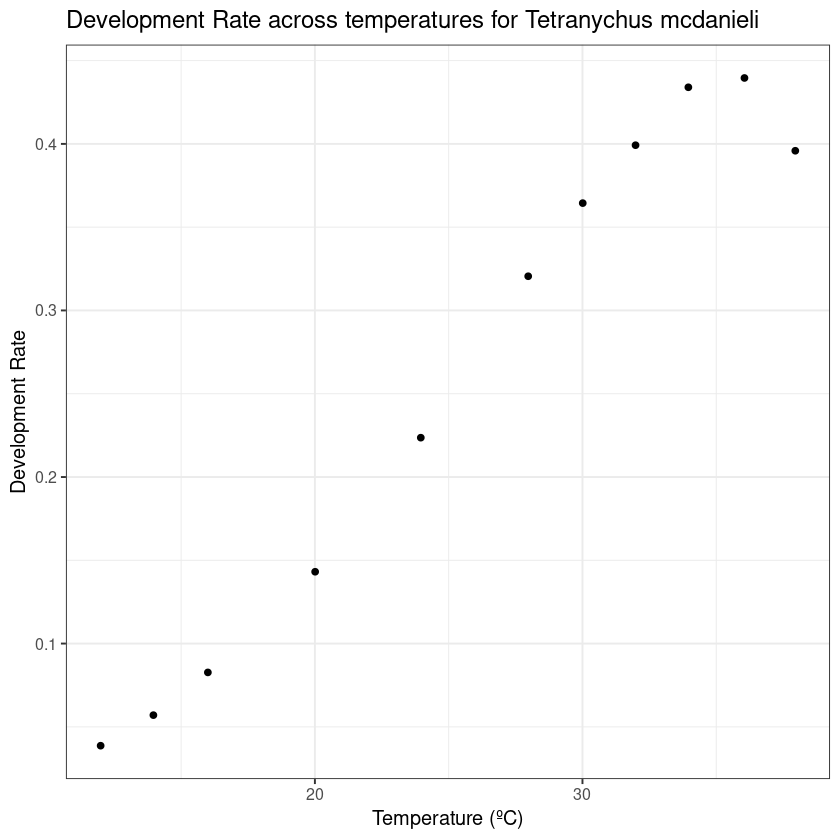

In [7]:
#visualize
ggplot(df2, aes(ambienttemp, originaltraitvalue))+
  geom_point()+
  theme_bw(base_size = 12) +
  labs(x = 'Temperature (ºC)',
       y = 'Development Rate',
       title = 'Development Rate across temperatures for Tetranychus mcdanieli')

In [8]:
# choose model
mod = 'sharpschoolhigh_1981'

In [9]:
# get start vals
start_vals <- get_start_vals(df2$ambienttemp, df2$originaltraitvalue, model_name = 'sharpeschoolhigh_1981')

In [10]:
# get limits
low_lims <- get_lower_lims(df2$ambienttemp, df2$originaltraitvalue, model_name = 'sharpeschoolhigh_1981')
upper_lims <- get_upper_lims(df2$ambienttemp, df2$originaltraitvalue, model_name = 'sharpeschoolhigh_1981')

In [11]:
start_vals

r_tref          e         eh         th 
 0.2635267  0.7758091  0.4569190 37.0042988

In [12]:
low_lims

r_tref      e     eh     th 
     0      0      0      1

In [13]:
upper_lims

r_tref          e         eh         th 
 0.4395753 10.0000000 20.0000000 37.9543362

In [14]:
# fit model
fit <- nls_multstart(originaltraitvalue~sharpeschoolhigh_1981(temp = ambienttemp, r_tref,e,eh,th, tref = 15),
                     data = df2,
                     iter = 500,
                     start_lower = start_vals - 10,
                     start_upper = start_vals + 10,
                     lower = low_lims,
                     upper = upper_lims,
                     supp_errors = 'Y')
fit

Nonlinear regression model
  model: originaltraitvalue ~ sharpeschoolhigh_1981(temp = ambienttemp,     r_tref, e, eh, th, tref = 15)
   data: data
  r_tref        e       eh       th 
 0.07262  0.95862  1.90329 34.74431 
 residual sum-of-squares: 0.000596

Number of iterations to convergence: 19 
Achieved convergence tolerance: 1.49e-08

In [15]:
# calculate additional traits
calc_params(fit) %>%
  # round for easy viewing
  mutate_all(round, 2)

rmax,topt,ctmin,ctmax,e,eh,q10,thermal_safety_margin,thermal_tolerance,breadth,skewness
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.43,34.81,6.22,70.34,0.65,NA,2.34,35.53,64.12,8.98,NA


In [16]:
# predict new data
new_data <- data.frame(ambienttemp = seq(min(df2$ambienttemp), max(df2$ambienttemp), 0.5))
preds <- augment(fit, newdata = new_data)

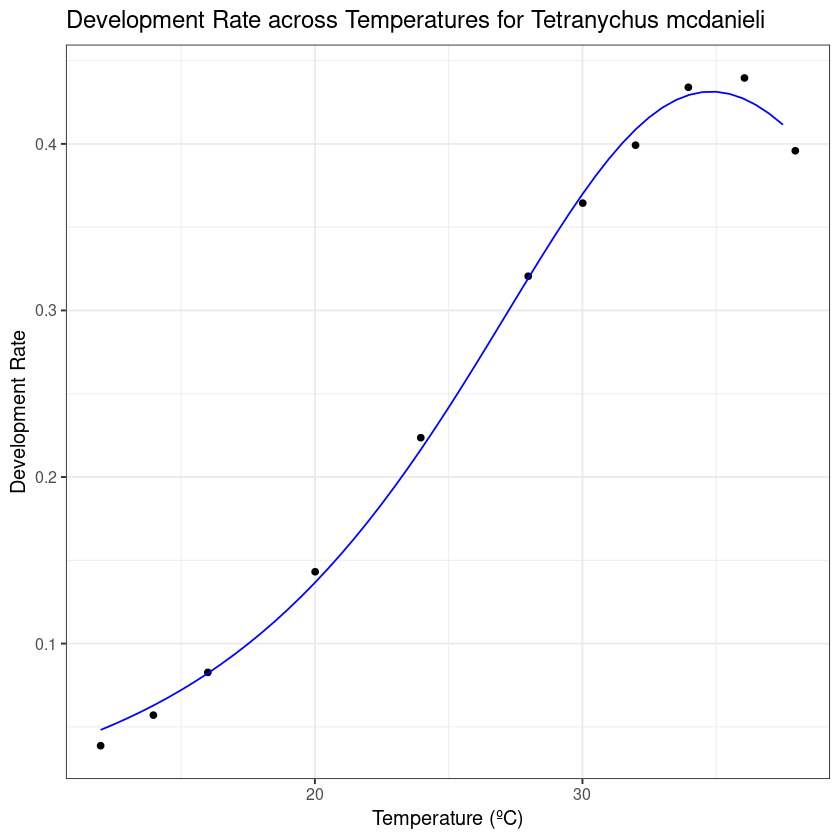

In [17]:
#visualize with new line
ggplot(df2, aes(ambienttemp, originaltraitvalue))+
  geom_point()+
  geom_line(aes(ambienttemp, .fitted), preds, col = 'blue') +
  theme_bw(base_size = 12) +
  labs(x = 'Temperature (ºC)',
       y = 'Development Rate',
       title = 'Development Rate across Temperatures for Tetranychus mcdanieli')